initialised


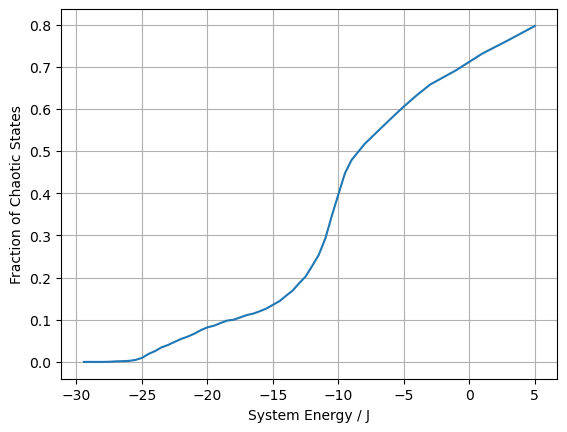

-1.6451990669450662
Starting


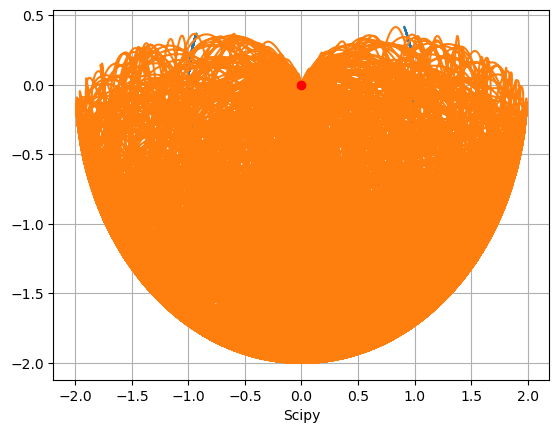

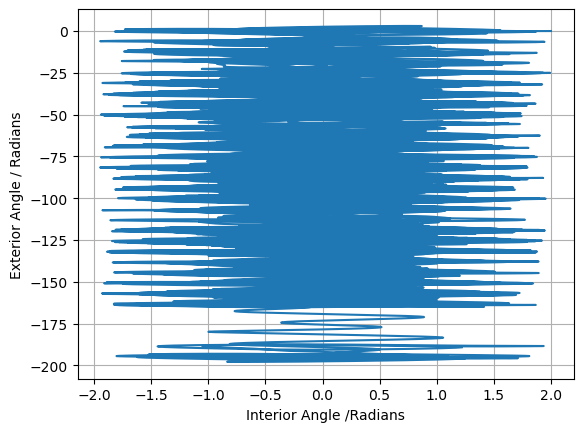

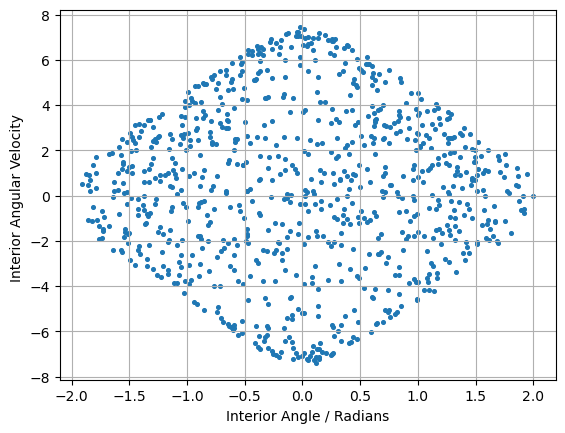

Scipy Analysis Finished
Phase Difference Checks, Stop now if need
12.175820593285545 Lyapunov Exponent
Many
[ 5  7  9 11 13 15 17 19]


C:\Users\Home\AppData\Local\Temp\ipykernel_2724\1531997628.py:366: RuntimeWarning: overflow encountered in exp
  lapunov = np.exp(np.multiply(Sum,time))
C:\Users\Home\AppData\Local\Temp\ipykernel_2724\1531997628.py:28: RuntimeWarning: invalid value encountered in scalar power
  wpos = ( -b + ( (b**2) - 4*(a)*(c) )**(1/2) ) / (2*a)
C:\Users\Home\AppData\Local\Temp\ipykernel_2724\1531997628.py:29: RuntimeWarning: invalid value encountered in scalar power
  wmin = (-b - ( (b**2) - 4*(a)*(c))**(1/2) ) / (2*a)


(48205, 5)
0.0 BAD Energy
[0.0, -0.8860902356278904, -0.6246412953989711, 3.5892380896130467]
[0.0, 0.8860902356278899, 2.0127330629522415, -3.3574850897461603]
[0.02062595202858279, -0.5638756044904758, -1.2494016964531713, 4.6415050192799345]
[0.04125190405716558, 0.7249829200591829, -2.4298533743347983, -0.3096769227114802]
[0.10312976014291395, 1.0471975511965974, 2.0050122593559045, -2.3432947092598275]


KeyboardInterrupt: 

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.integrate import solve_ivp
from scipy.integrate import RK45
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from math import floor, ceil, isnan
from scipy.optimize import curve_fit
#Functions

def gfunc(l1,l2,m1,m2,theta1,theta2, dt1dt, dt2dt):

  f1 = -l2 * m2 / (l1*(m1+m2)) * dt2dt**(2) * np.sin(theta1 - theta2) - g / l1 * np.sin(theta1)
  f2 = l1/l2 * dt1dt **(2) * np.sin(theta1 - theta2) - g/l2 * np.sin(theta2)
  a1 = l2 * m2 / (l1*(m1+m2))*np.cos(theta1 - theta2)
  a2 = l1 / l2 * np.cos(theta1 - theta2)
  g1 = (f1 - a1 * f2) / ( 1- a1 * a2)
  g2 = (f2 - a2 * f1) / (1- a1 * a2)
  return(g1, g2)

def quad(l1, l2, m1, m2, phi,phi2, w1, K):
  c = -K + (1/2)*(m1+m2)*(l1**2)*(w1**2)
  
  b =  m2 * l1 * l2 * (np.cos(phi - phi2)) * w1
 
  a = (1/2) * (l2**2) * (m2)
  wpos = ( -b + ( (b**2) - 4*(a)*(c) )**(1/2) ) / (2*a)
  wmin = (-b - ( (b**2) - 4*(a)*(c))**(1/2) ) / (2*a)
  return(wpos, wmin)



def Diff(t,a):

  z[0] =  a[2]
  z[1] =  a[3]
  z[2] = gfunc(l1,l2,m1,m2,a[0], a[1], a[2], a[3])[0]
  z[3] = gfunc(l1,l2,m1,m2,a[0], a[1], a[2], a[3])[1]
  return z


# Adapted RK4 Algorithm
def RK4(a,b,M,n0,func):
    #Calculates step size
    h = (b-a)/M
    #Defining intial values, initialising matrices
    t0 = a
    w = n0
    wmat = np.zeros((M, 4))
    wmat[0,:] = n0

    tmat = [t0]

    for i in range(1,M):

        k1 = func(t0,w)
        k2 = func(t0+h/2,w + np.multiply(h/2, k1))
        k3 = func(t0+h/2,w + np.multiply(h/2, k2))
        k4 = func(t0+h/2,w + np.multiply(h, k3))

        # Updating our values
        for n in range(0, 4):
          wout = w[n] + h/6 * (k1[n] +2*k2[n] + 2*k3[n] +k4[n])
          w[n] = wout
        wmat[i, :] = w


        tout=(a + (i)*h)
        t0 = tout
        tmat.append(t0)

    return wmat, tmat



def RKF(a,b,M,e,n0,func):
    #time step
    h = (b-a)/M
    #Starting conditions
    t = a
    y = n0
    #Inefficient matrix storing of values
    tm = [a]
    ym = np.zeros((100*M, 4))
    ym[0,:] = n0
    y56 = [0,0,0,0]
    y44 = [0,0,0,0]
    #Note the function does not actually run up to t = 30
    i = 0
    while t < b:
        print(t / b % .1)
        #Step in time
        i += 1
        t = t+h
        #finding kn values
        k1 =  np.multiply( h,func( t , y ))
        k2 =  np.multiply(h,func( t+(1/2)*h , y + np.multiply(k1, 1/2) ))
        k3 =  np.multiply(h,func( t+(1/2)*h , y + np.multiply((1/4),(k1 +k2))))
        k4 =  np.multiply(h,func( t+(1)*h   , y + -k2 + np.multiply(2,k3)))
        k5 =  np.multiply(h,func( t+(2/3)*h , y + np.multiply((1/27),(np.multiply(7,k1) + np.multiply(10,k2) + k4))))
        k6 =  np.multiply(h,func( t+(1/5)*h , y +  np.multiply((1/625),(np.multiply(28,k1) - np.multiply(125,k2) + np.multiply(546,k3) + np.multiply(54,k4) - np.multiply(378,k5)))))
        for n in range(0,4):
          y56[n] = y[n] + (1/336) * (14*k1[n] + 35 * k4[n] + 162 * k5[n] + 125 * k6[n])
          y44[n] = y[n] + (1/6) * (k1[n] + 4*k3[n] +k4[n])

        #Internal Error calculation
        x = np.subtract(y44, y56)
        TE = np.sqrt(x.dot(x))

        #Special Case! If y56 = y44, the method chosen to calculate a new h divides by 0, no bueno
        if TE == 0:
            y = y56
            ym[i, :] = y
            tm.append(t)
            # 1.1 is merely a weight and can be adjusted within reason to better fit the function
            h = 1.1*h

        else:
            # Calculates new step size, if e < TE the step size shrinks, otherwise it grows slightly
            #the weight 0.9 is chosen arbitrarily
            hn = 0.90 * h * (e/(TE))**(1/5)

            if (TE) > e:
                t = t-h
                h = hn
            else:
                y = y56
                h = hn

                #Only carry forward 'Good' h and y values
                ym[i, :] = y
                tm.append(t)



    return ym, tm




def energy (l1, l2, m1, m2, w1, w2, t1, t2):
    
    K = 1/2 * m1 * l1**2 * w1**2 + 1/2 * m2 *(l1**2 * w1 **2 + l2**2 * w2 **2 + 2 * l1 * l2 * w1 * w2 * np.cos(t1 - t2))
    V = - (m1 + m2) * g * l1 * np.cos(t1) - m2 * g * l2 * np.cos(t2)
    E =  K + V
    return E

    
    


def normalize(num, lower=0.0, upper=360.0, b=False):
   
    # abs(num + upper) and abs(num - lower) are needed, instead of
    # abs(num), since the lower and upper limits need not be 0. We need
    # to add half size of the range, so that the final result is lower +
    # <value> or upper - <value>, respectively.
    res = num
    if not b:
        if lower >= upper:
            raise ValueError("Invalid lower and upper limits: (%s, %s)" %
                             (lower, upper))
        res = num
        if num > upper or num == lower:
            num = lower + abs(num + upper) % (abs(lower) + abs(upper))
        if num < lower or num == upper:
            num = upper - abs(num - lower) % (abs(lower) + abs(upper))

        res = lower if res == upper else num
    else:
        total_length = abs(lower) + abs(upper)
        if num < -total_length:
            num += ceil(num / (-2 * total_length)) * 2 * total_length
        if num > total_length:
            num -= floor(num / (2 * total_length)) * 2 * total_length
        if num > upper:
            num = total_length - num
        if num < lower:
            num = -total_length - num

        res = num * 1.0  # Make all numbers float, to be consistent

    return res # Source, Python classes and functions for working with angles, Prasanth, Github
               #https://gist.github.com/phn/1111712/35e8883de01916f64f7f97da9434622000ac0390#










############################################################# Main Code ##########################################
print('initialised')




#Conditions

EP = [-29.43,-29,-28.5, -28,-27.5, -27,-26.5, -26,  -25.5, -25,  -24.5, -24,  -23.5, -23,  -22.5, -22,  -21.5, -21,
 -20.5, -20,  -19.5, -19,  -18.5, -18,  -17.5, -17,  -16.5, -16,  -15.5, -15,
 -14.5, -14,  -13.5, -13,  -12.5, -12,  -11.5, -11,  -10.5, -10,   -9.5,  -9,
  -8,   -7,   -6,     -5,    -4,     -3,
   -1,  1, 3, 5]
CP = [0.0, 9.190331770976932e-05, 0.0, 0.0, 0.00035969605683197696, 0.0013332777800924961, 0.001770167262743398, 0.002438103087119261, 0.004664034078542334,
      0.009581085463282332, 0.01886157899162019, 0.025731544677178943, 0.03469041775258723, 0.040274124659153976, 0.047655154982652055, 0.05459189339255969,
      0.06016155088852989, 0.06702879553700636, 0.07541003950443649,  0.08207264041158817, 0.08582392151433035, 0.0922610312102534, 0.09803234658725989, 
      0.10008125933064989, 0.10558773360325405, 0.11102601938846032, 0.11467630363759149, 0.12021274671201404, 0.12656112418911392, 0.1354890950377581,
      0.1441212774464978, 0.15682564799367055, 0.16887714484137067, 0.18657278094632793, 0.20272907680448723, 0.2278212417189044, 0.2538028392418114, 
      0.29269630349279974, 0.34679701962944265, 0.3977064561769305, 0.44730778473586746, 0.4786975087977967, 0.5168685877180008, 0.5469329566904708,
      0.5767640267685925, 0.6058896023869754, 0.6328107807220805, 0.6576659216289196, 0.6919879995324493, 0.731464414061982, 0.763402837052392, 0.7968104936140835]
plt.plot(EP, CP)
plt.grid()
plt.xlabel('System Energy / J')
plt.ylabel('Fraction of Chaotic States')
plt.show()
plt.close()

#parameters and conditions
l1 = 1
l2 = 1
g = 9.81
m1 = 1
m2 = 1
t0 = 0
tf = 1000
M = tf * 1000
theta1 = 2
theta2 = 0
dt1dt =0
dt2dt =0
E = energy(l1, l2, m1, m2, dt1dt, dt2dt, theta1, theta2)
print(E)
a = [theta1, theta2, dt1dt, dt2dt]
z = [0,0,0,0]
#Calling functions

print('Starting')
Tvals = np.linspace(t0, tf, M)
#Scipy Solver
sol =  solve_ivp(Diff, (t0,tf), a, method='DOP853', t_eval=Tvals, dense_output=True, vectorized=True, args=None)
sciphi1 = sol.y[0]
sciphi2 = sol.y[1]
scimom1 = sol.y[2]
scimom2 = sol.y[3]
x1 = l1 * np.sin(sciphi1)
y1 = -l1 * np.cos(sciphi1)
x2 = x1 + l2 * np.sin(sciphi2)
y2 = y1 + -l2 *np.cos(sciphi2)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(0,0, 'ro')
plt.xlabel('Scipy')
plt.grid()
plt.show()
plt.close()

plt.plot(sciphi1, sciphi2)
plt.xlabel('Interior Angle /Radians')
plt.ylabel('Exterior Angle / Radians')
plt.grid()
plt.show()
plt.close()

#Index argument
pin =[]
phin= []
reduced = np.zeros(np.shape(sciphi2))
for i in range(0, np.shape(sciphi2)[0]):
    a = normalize(sciphi2[i], -np.pi, np.pi)
    reduced[i] = a

idx = np.argwhere(np.diff(np.sign(reduced))).flatten()
for n in range(0, np.shape(idx)[0]):
    check = np.abs(reduced[idx[n]-1] - reduced[idx[n]+1])
    if check < 1:
        pin.append((scimom1[idx[n]]))
        phin.append(normalize(sciphi1[idx[n]], -np.pi, np.pi))
plt.scatter(phin, pin, s = 7)
plt.ylabel('Interior Angular Velocity ')
plt.xlabel('Interior Angle / Radians')
plt.grid()
plt.show()
plt.close()



print('Scipy Analysis Finished')

 
#Calling Functions
E = energy(l1, l2, m1, m2, dt1dt, dt2dt, theta1, theta2)
a = [theta1, theta2, dt1dt, dt2dt]
z = [0,0,0,0]
Tvals = np.linspace(t0, tf, M)
sol =  solve_ivp(Diff, (t0,tf), a, method='DOP853', t_eval=Tvals, dense_output=True, vectorized=True, args=None)
phi1 = sol.y[0]
phi2 = sol.y[1]
mom1 = sol.y[2]
mom2 = sol.y[3]
#Results
x1 = l1 * np.sin(phi1)
y1 = -l1 * np.cos(phi1)
x2 = x1 + l2 * np.sin(phi2)
y2 = y1 + -l2 *np.cos(phi2)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(0,0, 'ro')
plt.xlabel('Correct')
plt.grid()
plt.close()
plt.plot(phi1, phi2)
plt.xlabel('Radians vs Radians')
plt.close()



p1 = l1 * m1 * mom1
p2 = l2 * m2 * mom2

pin =[]
phin= []
reduced = np.zeros(np.shape(phi2))
for i in range(0, np.shape(phi2)[0]):
    a = normalize(phi2[i], -np.pi, np.pi)
    reduced[i] = a

idx = np.argwhere(np.diff(np.sign(reduced))).flatten()
for n in range(0, np.shape(idx)[0]):
    check = np.abs(reduced[idx[n]-1] - reduced[idx[n]+1])
    if check < 1:
        pin.append((mom1[idx[n]]))
        phin.append(normalize(phi1[idx[n]], -np.pi, np.pi))
plt.scatter(phin, pin, s = 10)
plt.ylabel('Momentum')
plt.xlabel('Radians, Scatter RK4')
plt.grid()
plt.close()


#Phase Difference
print('Phase Difference Checks, Stop now if need')
#New Conditions
e = 0.001
a = [theta1+e, theta2, dt1dt, dt2dt]
z = [0,0,0,0]


sol =  solve_ivp(Diff, (t0,tf), a, method='DOP853', t_eval=Tvals, dense_output=True, vectorized=True, args=None)
phi12 = sol.y[0]
phi22 = sol.y[1]
mom12 = sol.y[2]
mom22 = sol.y[3]
time = np.delete(sol.t, 0)

phidiff1 = np.abs((phi12 - phi1))
phidiff2 =np.abs(np.delete((phi22-phi2), 0))
DIV = np.divide(phidiff2, e)
Log =np.log(DIV)
Sum = np.sum(Log) / np.shape(Log)[0]
print(Sum, "Lyapunov Exponent")
lapunov = np.exp(np.multiply(Sum,time))
plt.plot(time, phidiff2)
plt.xlabel('time')
plt.ylabel('Phase Difference')

plt.close()




#CHECKPOINT

plt.plot(EP, FP)
plt.grid()

plt.close()


#Set a specific range of energies.
print('Many')
lapstates = []
ratio = []
E = np.arange(5,21, 2)
print(E)
E = [-20.410731241132904]
for i in E:
    a = np.array([[0,0,0,0,0]])
    theta1max = np.arccos(i / (-(m1+m2)*g*l1 - m2 * g * l2))
    theta1 = np.linspace(0, theta1max, N)
    theta2 = np.linspace(-np.pi, np.pi, N)
    for t1 in theta1:
        for t2 in theta2:
             
             V = -(m1+m2)*g*l1*np.cos(t1) - m2*g*l2*np.cos(t2)
             K = i - V
             if K < 0:
                 continue
             else:
                 maxw1 = (K * 2 / (l1**2 * (m1 + m2)))**1/2
                 w1range = np.linspace(-maxw1, maxw1, N)
                 for w in w1range:
                     w2 = quad(l1, l2, m1, m2, t1,t2, w, K)
                     if isnan(w2[0]):
                         continue
                     elif isnan(w2[1]):
                         continue
                     else:
                         z = np.array([[t1, t2, w, w2[0], i]])
                         a = np.concatenate((a, z), axis = 0)
                         z = np.array([[t1, t2, w, w2[1], i]])
                         a = np.concatenate((a, z), axis = 0)
    t0 = 0
    tf = 3
    M = tf * 1000
    Tvals = np.linspace(t0, tf, M)
    z = [0,0,0,0]
    e = 0.001
    lapexp = []
    print(np.shape(a))
    gamma = np.shape(a)[0]
    for x in range(0, np.shape(a)[0]):
        b = a[x,:]
        t1 = b[0]
        t2 = b[1]
        w1 = b[2]
        w2 = b[3] #Only puling one possible w2 for now
        En = b[4]
        if En != i:
            print(En, 'BAD Energy')
    
        c = [t1, t2, w1, w2]
        cprime = [t1+e, t2, w1, w2] 
        sol =  solve_ivp(Diff, (t0,tf), c, method='DOP853', t_eval=Tvals, dense_output=True, vectorized=True, args=None)
        phi1 = sol.y[0]
        phi2 = sol.y[1]
        mom1 = sol.y[2]
        mom2 = sol.y[3]
    
        sol =  solve_ivp(Diff, (t0,tf), cprime, method='DOP853', t_eval=Tvals, dense_output=True, vectorized=True, args=None)
        phi12 = sol.y[0]
        phi22 = sol.y[1]
        mom12 = sol.y[2]
        mom22 = sol.y[3]
            
        phidiff1 = np.abs(phi12 - phi1)
        phidiff2 = np.delete(np.abs(phi22 - phi2), 0) 
        DIV = np.divide(phidiff2, e)
        Log = np.log(DIV)
        exponent = np.sum(Log) / np.shape(Log)[0]
        lapexp.append(exponent)
        check = 0
        if exponent > 1:
            print(c)
            check+=1
        

    sign = np.sign(lapexp)
    
    a = 0
    b = 0
    for y in sign:
        if y <= 0:
            a +=1
        elif y > 0:
            b +=1
    tau = b/np.shape(sign)[0]
    ratio.append(tau)
    lapstates.append(tau*gamma)
    print(ratio)
    
    
    
print(E)
plt.plot(E, ratio)
plt.grid()
plt.xlabel('Total System Energy' )
plt.ylabel('Chaotic States out of Total Checked States' )
plt.show()
plt.close()

plt.plot(E, lapstates)
plt.grid()
plt.xlabel('energy')
plt.ylabel('Weighted')
plt.show()
plt.close()
        
#CHECKPOINT



EP = [-29.43,-29,-28.5, -28,-27.5, -27,-26.5, -26,  -25.5, -25,  -24.5, -24,  -23.5, -23,  -22.5, -22,  -21.5, -21,
 -20.5, -20,  -19.5, -19,  -18.5, -18,  -17.5, -17,  -16.5, -16,  -15.5, -15,
 -14.5, -14,  -13.5, -13,  -12.5, -12,  -11.5, -11,  -10.5, -10,   -9.5,  -9,
  -8,   -7,   -6,     -5,    -4,     -3,
   -1,      0, 1, 3, 5]
CP = [0.0, 9.190331770976932e-05, 0.0, 0.0, 0.00035969605683197696, 0.0013332777800924961, 0.001770167262743398, 0.002438103087119261, 0.004664034078542334,
      0.009581085463282332, 0.01886157899162019, 0.025731544677178943, 0.03469041775258723, 0.040274124659153976, 0.047655154982652055, 0.05459189339255969,
      0.06016155088852989, 0.06702879553700636, 0.07541003950443649,  0.08207264041158817, 0.08582392151433035, 0.0922610312102534, 0.09803234658725989, 
      0.10008125933064989, 0.10558773360325405, 0.11102601938846032, 0.11467630363759149, 0.12021274671201404, 0.12656112418911392, 0.1354890950377581,
      0.1441212774464978, 0.15682564799367055, 0.16887714484137067, 0.18657278094632793, 0.20272907680448723, 0.2278212417189044, 0.2538028392418114, 
      0.29269630349279974, 0.34679701962944265, 0.3977064561769305, 0.44730778473586746, 0.4786975087977967, 0.5168685877180008, 0.5469329566904708,
      0.5767640267685925, 0.6058896023869754, 0.6328107807220805, 0.6576659216289196, 0.6919879995324493, 0.731464414061982, 0.763402837052392, 0.7968104936140835]
             
     





print('Finished')